In [43]:
import pandas as pd
from pandas import read_excel
import numpy as np 
import re 
from re import sub
import multiprocessing
from unidecode import unidecode
import os 
from time import time 
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation,Embedding, Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split




#clean unwwanted thing from dataset 

In [24]:
def text_to_word_list(text):
    text=text.split()
    return text

def replace_strings(text):
    emoji_pattern=re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F""]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)
    return text


# remove punctuations

def remove_punctuations(my_str):
        # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out




In [25]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install xlrd==1.2.0

In [27]:
df=pd.read_excel('predicted_unsupervised_sentiment.xlsx')
display(df)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
...,...,...,...,...,...
6647,6647,NaN,NaN,আমি কখনো আশা করিনি যে আমি আমার স্বপ্নের প্রিয় ...,1
6648,6648,NaN,NaN,মিডিয়া লিটনকে একজন খারাপ মানুষ হিসেবে প্রতিষ্ঠ...,0
6649,6649,NaN,NaN,বাংলাদেশের জন্ম কিংবা তার পূর্বের ইতিহাস অনেকে...,0
6650,6650,NaN,NaN,আপনারা সিম নিবন্দন করালেন বাংলাদেশে অপরাধ কমবে...,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

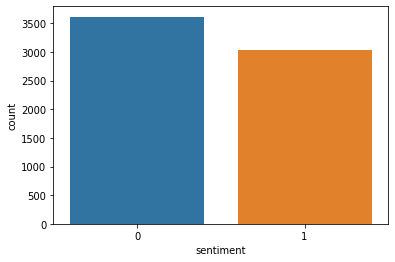

In [28]:
sns.countplot(x ='sentiment', data = df)

In [29]:
df["sentence"]= df.sentence.apply(lambda x: preprocessing(str(x)))

In [30]:
df.reset_index(drop=True,inplace=True)

In [31]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
...,...,...,...,...,...
6647,6647,NaN,NaN,আমি কখনো আশা করিনি যে আমি আমার স্বপ্নের প্রিয় ...,1
6648,6648,NaN,NaN,মিডিয়া লিটনকে একজন খারাপ মানুষ হিসেবে প্রতিষ্ঠ...,0
6649,6649,NaN,NaN,বাংলাদেশের জন্ম কিংবা তার পূর্বের ইতিহাস অনেকে...,0
6650,6650,NaN,NaN,আপনারা সিম নিবন্দন করালেন বাংলাদেশে অপরাধ কমবে...,0


In [32]:
train1, test1= train_test_split(df,random_state=42,test_size=0.2)
training_sentences=[]
testing_sentences=[]



train_sentences=train1['sentence'].values
train_labels=train1['sentiment'].values

for i in range(train_sentences.shape[0]):
    x=str(train_sentences[i])
    training_sentences.append(x)
training_sentences=np.array(training_sentences)



test_sentences=test1['sentence'].values
test_labels=test1['sentiment'].values

for i in range(test_sentences.shape[0]):
    x=str(test_sentences[i])
    testing_sentences.append(x)

testing_sentences=np.array(testing_sentences)

train_labels=tf.keras.utils.to_categorical(train_labels)

test_labels=tf.keras.utils.to_categorical(test_labels)

print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))




Training Set Length: 5321
Testing Set Length: 1331
training_sentences shape: (5321,)
testing_sentences shape: (1331,)
train_labels shape: (5321, 2)
test_labels shape: (1331, 2)


In [33]:
print(training_sentences[1])
print(train_labels[0])

মূলত তাঁর প্রয়াসেই বাংলাদেশ ক্রিকেটে এতকিছু পেয়েছে তাঁর হাত ধরেই বাংলাদেশ একদিন স্বপ্নের সোনালি সিঁড়ি বেয়ে বিশ্বকে দেখিয়ে বিশ্বকাপ নিয়ে আসবে আর সারা বিশ্ব সাকিবের নামে বিজয়ের স্লোগান দিবে
[1. 0.]


In [34]:
vocab_size=25000
embedding_dim=300
max_length=100
trunc_type='post'
oov_tok='<OOV>'

In [35]:
print(training_sentences.shape)
print(train_labels.shape)

(5321,)
(5321, 2)


In [36]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
print(len(word_index))
print("word index length : "+str(len(tokenizer.word_index)))
sequences=tokenizer.texts_to_sequences(training_sentences)
padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)


test_sequences= tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(test_sequences, maxlen=max_length)

18442
word index length : 18442


In [37]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

কারাগারে বিলাসী জীবন কাটছিল মুফতি হান্নানের

Sentence Tokenized and Converted into Sequence :--> 

[6842, 6843, 235, 6844, 6845, 4363]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 6842 6843  235 6844
 6845 4363]


In [38]:
print("Padded shape(training) :" + str(padded.shape))
print("Padded shape(testing) :" + str(testing_padded.shape))

Padded shape(training) :(5321, 100)
Padded shape(testing) :(1331, 100)


In [39]:
# Model creation 
with tf.device('/gpu:0'):
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(200, kernel_size=3, activation="relu"))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Flatten())


    #l2 regularizer
    model.add(Dense(100, kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(Dense(2, activation='softmax'))
    adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          7500000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 200)           180200    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 98, 128)           135680    
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 128)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_5 (Dense)              (None, 50)               

In [40]:
history= model.fit(padded,train_labels, epochs=5, batch_size=256,validation_data=(testing_padded,test_labels),use_multiprocessing= True, workers=8)

Epoch 1/5
21/21 [==============================] - 49s 2s/step - loss: 1.2912 - accuracy: 0.5531 - val_loss: 1.2178 - val_accuracy: 0.5973
Epoch 2/5
21/21 [==============================] - 34s 2s/step - loss: 1.0672 - accuracy: 0.7237 - val_loss: 0.9253 - val_accuracy: 0.8024
Epoch 3/5
21/21 [==============================] - 35s 2s/step - loss: 0.6790 - accuracy: 0.9145 - val_loss: 0.8384 - val_accuracy: 0.8415
Epoch 4/5
21/21 [==============================] - 36s 2s/step - loss: 0.4568 - accuracy: 0.9778 - val_loss: 0.8624 - val_accuracy: 0.8482
Epoch 5/5
21/21 [==============================] - 37s 2s/step - loss: 0.3594 - accuracy: 0.9925 - val_loss: 0.9863 - val_accuracy: 0.8445


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


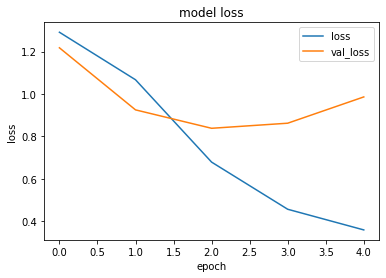

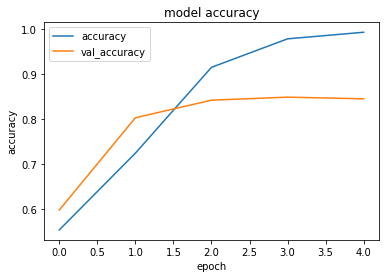

In [41]:
#Visualization
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [42]:
loss_and_metrics=model.evaluate(padded,train_labels,batch_size=256)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

21/21 [==============================] - 8s 377ms/step - loss: 0.3271 - accuracy: 0.9945
The train accuracy is: 0.9945498704910278
6/6 [==============================] - 2s 348ms/step - loss: 0.9863 - accuracy: 0.8445
The test accuracy is: 0.8444778323173523
